In [433]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix

In [434]:
data = pd.read_csv("spam.csv", encoding='latin1')

In [435]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [436]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [437]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [438]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [439]:
data.dropna(axis=0, inplace=True)
data.notnull()

,v1,v2
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
5567,True,True
5568,True,True
5569,True,True
5570,True,True


In [440]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


(array([4825.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         747.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

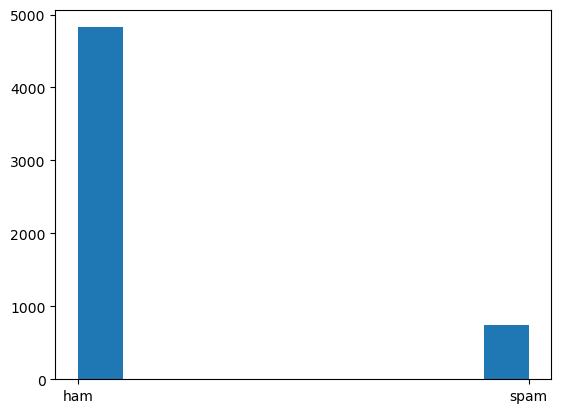

In [441]:
plt.hist(data['v1'])

In [442]:
data.loc[data["v1"] == "spam", "v1"] = 0
data.loc[data["v1"] == "ham", "v1"] = 1

In [443]:
X = data['v2']
y = data['v1']
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [444]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object

In [445]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [446]:
y_train

4281    1
585     1
4545    1
3034    1
2758    1
       ..
3772    1
5191    1
5226    1
5390    1
860     1
Name: v1, Length: 4179, dtype: object

In [447]:
# Converting raw documents into a tf-idf matrix of features

vectorizer = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)
X_vec_train = vectorizer.fit_transform(X_train)
X_vec_train

<4179x7180 sparse matrix of type '<class 'numpy.float64'>'
	with 32495 stored elements in Compressed Sparse Row format>

In [448]:
# Using the same vocabulary for both training and test sets

X_vec_test = vectorizer.transform(X_test)
X_vec_test

<1393x7180 sparse matrix of type '<class 'numpy.float64'>'
	with 9635 stored elements in Compressed Sparse Row format>

In [449]:
# Converting the labels to 'int' format RF don't work on dtype: object

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [450]:
# Using Random Forests for Classification

model = RandomForestClassifier()
model.fit(X_vec_train, y_train)

print(X_vec_test)

  (0, 6944)	0.2955760868726157
  (0, 6548)	0.3996528438335612
  (0, 4380)	0.38090827525349635
  (0, 3619)	0.17322671692781638
  (0, 3337)	0.34886422361436387
  (0, 3125)	0.34886422361436387
  (0, 2867)	0.341737869380907
  (0, 2583)	0.34886422361436387
  (0, 1698)	0.3096938177417745
  (1, 6346)	0.2743764127963315
  (1, 6343)	0.19426047297740484
  (1, 5580)	0.2206321972271291
  (1, 5514)	0.3540765342185054
  (1, 5510)	0.3540765342185054
  (1, 5509)	0.25586411444544094
  (1, 5312)	0.3374695915164675
  (1, 4582)	0.3027661688602919
  (1, 3584)	0.3165473180705573
  (1, 2557)	0.325686778154545
  (1, 1904)	0.24598665673237113
  (1, 1869)	0.22306604743811803
  (2, 4879)	0.40390556838936
  (2, 3955)	0.5095067275565978
  (2, 3696)	0.4866533489092402
  (2, 2610)	0.48560977813149514
  :	:
  (1386, 659)	0.44668536775813067
  (1386, 500)	0.24982174523851744
  (1386, 329)	0.2097604719183399
  (1386, 304)	0.1639824104501496
  (1387, 6663)	0.34636625955565303
  (1387, 4441)	0.4474741046902783
  (1387, 3

In [451]:
# Predicting the validation dataset

pred = model.predict(X_vec_test)

In [452]:
# Determining the accuracy score

acc = accuracy_score(y_test, pred, normalize=True)
print(f"The accuracy rate of the model is : {acc}")

The accuracy rate of the model is : 0.9748743718592965


In [453]:
# Determining the error rate

error = mean_squared_error(y_test, pred)
print(f"The Mean Squared Error in making predictions is : {error}")

The Mean Squared Error in making predictions is : 0.02512562814070352


In [458]:
# Building the confusion matrix

cf = confusion_matrix(y_true=y_test, y_pred=pred)
cf

array([[ 156,   35],
       [   0, 1202]])

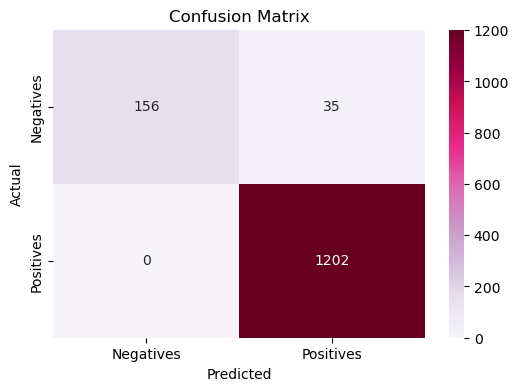

In [462]:
# PLotting the confusion matrix; 'Negatives' correspond to 'spam', while 'Positives' correspond to 'ham'

plt.figure(figsize=(6,4))
sns.heatmap(cf, cmap='PuRd', annot=True, fmt='d', xticklabels=['Negatives', 'Positives'], yticklabels=['Negatives', 'Positives'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

In [456]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

In [457]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=